In [1]:
import sys
print(sys.prefix)

C:\Users\jmjeon\anaconda3\envs\ml_study


# Decision Tree (Regression)

- 회귀와 분류가 모두 가능한 지도 학습 모델
- 회귀모델은 오차가 가장 줄어드는 조건(값이 비슷한 그룹으로 나눔)을 선택해서 계속 반복하여 학습한다.
- terminal node의 종속변수의 평균을 예측값으로 반환하므로 예측값의 종류는 terminal node의 개수와 일치한다.
- 계산의 복잡성 대비 높은 예측 성능을 가지며, 변수단위로 설명력을 가지는 것이 장점이다.
- 하지만 overfitting의 가능성이 있다는 단점이 있으며 해당 단점을 극복하기 위한 모델이 Random Forest

- 회귀모델에서는 MSE(Mean Squared Error)가 최소가 되는 방향으로 모델 학습이 이루어진다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from IPython.display import Image, display

# %matplotlib inline

## 1. Data load

In [158]:
# read data
hitters_df = pd.read_csv('../data/Hitters.csv', index_col=0)
hitters_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [159]:
hitters_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

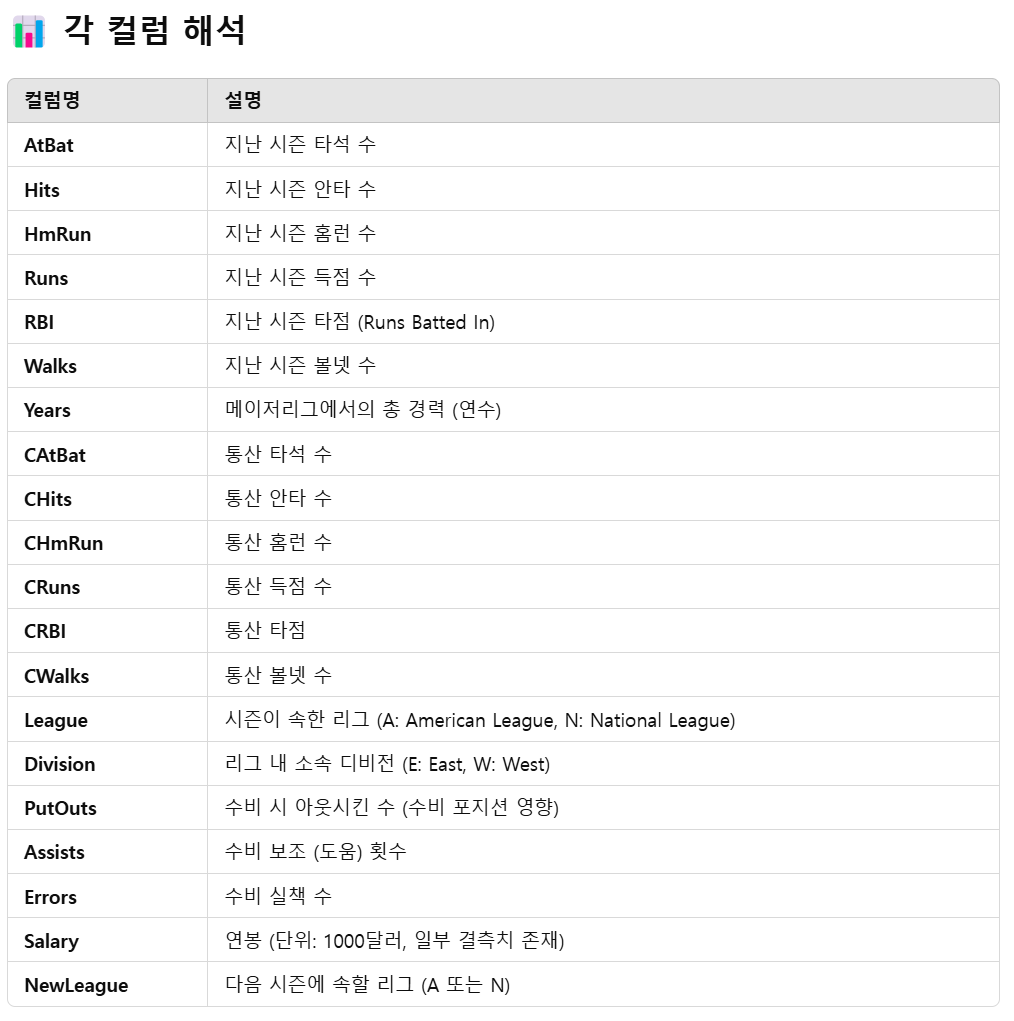

In [160]:
display(Image(filename='../image/decision_tree_col_info.png', width=600))

In [161]:
hitters_df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


## 2. Preprocessing

### 2-1. null 제거

In [162]:
hitters_df.dropna(how='any', inplace=True)
hitters_df.shape

(263, 20)

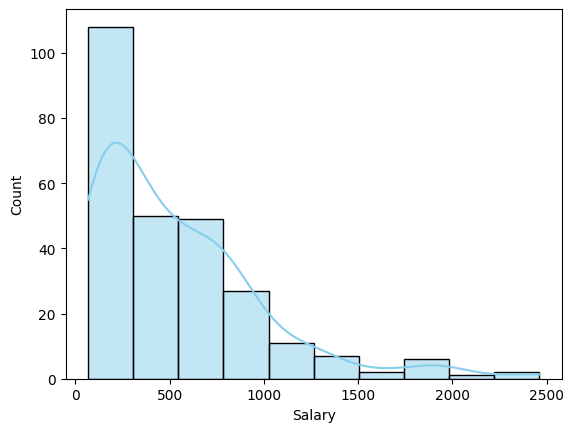

In [163]:
sns.histplot(data=hitters_df, x='Salary', bins=10, kde=True, color='skyblue')
plt.show()

## 2-2. y값 log 변환

In [164]:
# Salary(y값) log변환
hitters_df['Salary'] = np.log(hitters_df['Salary'])
hitters_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A


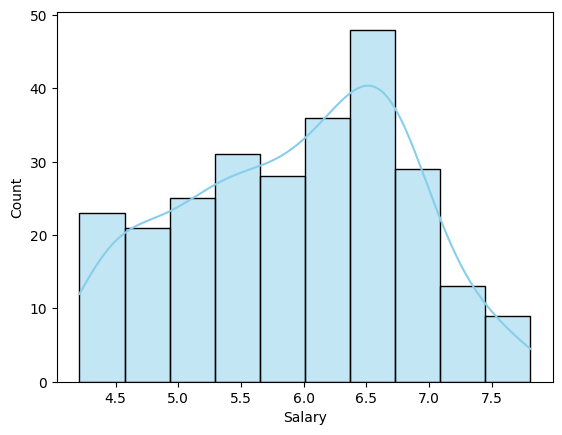

In [165]:
sns.histplot(data=hitters_df, x='Salary', bins=10, kde=True, color='skyblue')
plt.show()

## 3. Modeling

### 3-1. Decision tree test 
- 2가지 변수로만 테스트

In [192]:
X = hitters_df[['Years', 'Hits']]
y = hitters_df[['Salary']]

reg_tree = DecisionTreeRegressor(max_leaf_nodes=3)
reg_tree.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=3)

- 트리 구조 시각화

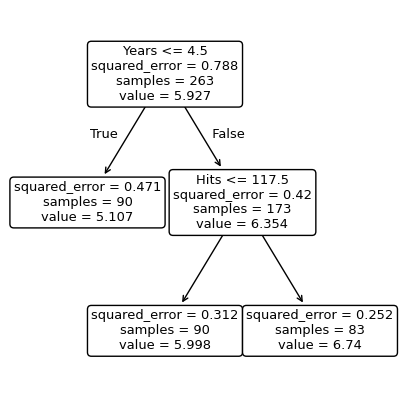

In [194]:
plt.figure(figsize=(5,5))
plot_tree(reg_tree,
          feature_names=X.columns,
          rounded=True)
plt.show()

- 데이터 분기 시각화

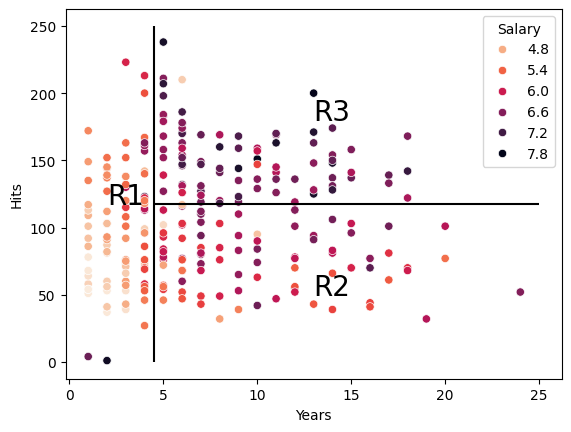

In [195]:
palette = sns.color_palette("rocket_r", as_cmap=True)
s = sns.scatterplot(x='Years', y='Hits', hue='Salary', data=hitters_df, palette=palette)

plt.vlines(4.5, ymin=0, ymax=250, colors='black')
plt.hlines(117.5, xmin=4.5, xmax=25, colors='black')
plt.annotate('R1', xy=(2, 117.5), fontsize=20)
plt.annotate('R2', xy=(13, 50), fontsize=20)
plt.annotate('R3', xy=(13, 180), fontsize=20)

plt.show()

### 3-2. Decision Tree 학습

In [196]:
X = hitters_df.drop('Salary', axis=1)
X = pd.get_dummies(X)
y = hitters_df[['Salary']]

print(X.shape, y.shape)

(263, 22) (263, 1)


In [197]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
print(X_train.shape, X_test.shape)

(210, 22) (53, 22)


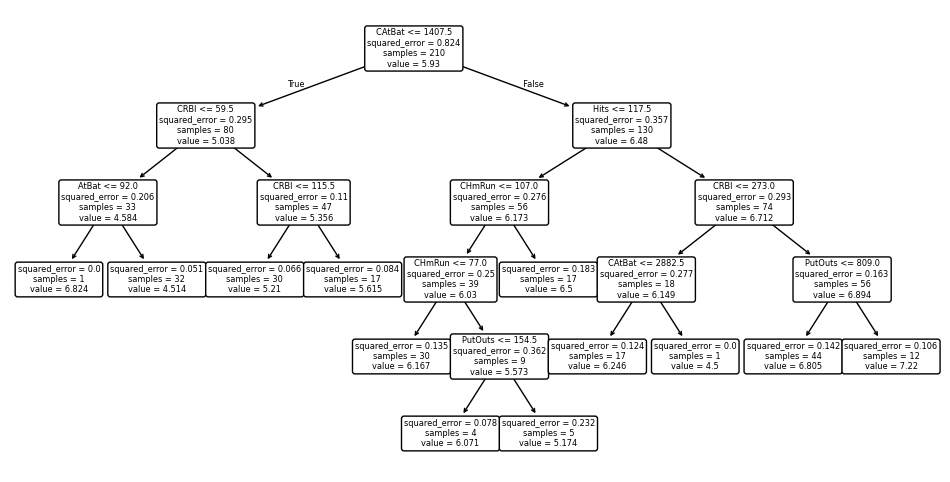

In [199]:
reg_tree = DecisionTreeRegressor(max_leaf_nodes=12)
reg_tree.fit(X_train,y_train)

plt.figure(figsize=(12,6))
plot_tree(reg_tree,
          feature_names=X.columns,
          rounded=True)
plt.show()

- 최적의 하이퍼 파라미터 찾기

In [200]:
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'max_leaf_nodes': [5, 10, 20, 30],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

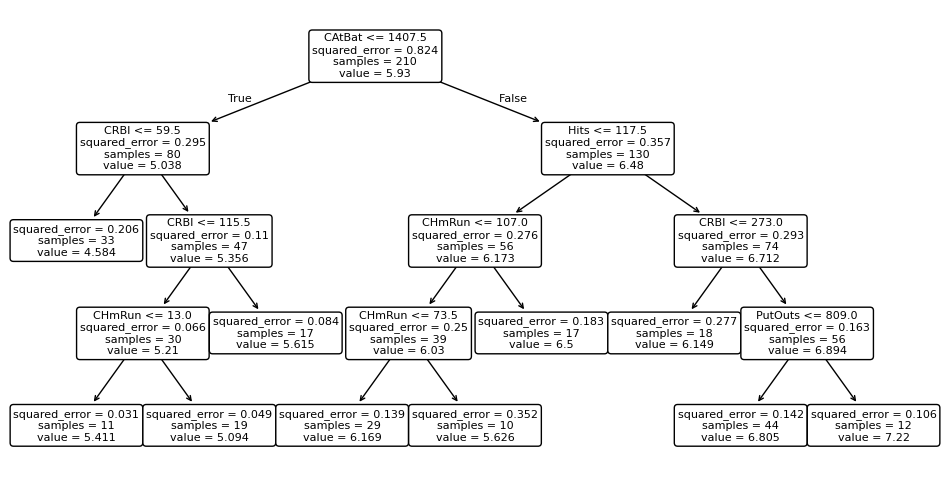

In [205]:
plt.figure(figsize=(12,6))
plot_tree(best_model,
          feature_names=X_train.columns,
          rounded=True)
plt.show()

In [202]:
y_pred = best_model.predict(X_test)

In [203]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Test RMSE:", round(rmse, 2))
print("Test R²:", round(r2, 4))

Best Parameters: {'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Test RMSE: 0.61
Test R²: 0.4207


In [156]:
# y값 log 변환 전 성능

# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Best Parameters:", grid.best_params_)
# print("Test RMSE:", round(rmse, 2))
# print("Test R²:", round(r2, 4))

Best Parameters: {'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Test RMSE: 419.93
Test R²: 0.025


- feature importance 확인

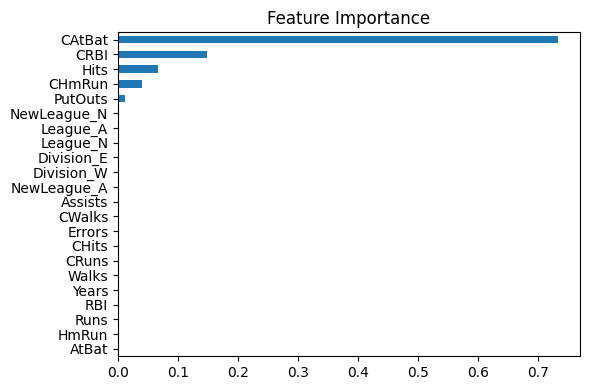

In [204]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(6, 4), title='Feature Importance')
plt.tight_layout()
plt.show()

- 최적의 하이퍼파라미터와 중요 Feature(3개)를 활용하여 최적의 Decision Tree 학습

In [208]:
top_features = importances.sort_values(ascending=False).head(3).index.tolist()

In [210]:
# 중요 피처만 사용해 다시 모델 학습
X_top = X[top_features]
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'max_leaf_nodes': [5, 10, 20, 30],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

final_best_model = grid.best_estimator_

In [214]:
y_pred = final_best_model.predict(X_test)

In [215]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Test RMSE:", round(rmse, 2))
print("Test R²:", round(r2, 4))

Best Parameters: {'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Test RMSE: 0.57
Test R²: 0.4952


# Decision Tree (Classfication)